In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [107]:
df_stock = pd.read_csv('AAPL.csv',  index_col=0)

In [108]:
df_stock.head()

,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,6.63,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,6.67,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,6.60,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,6.45,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,6.78,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


In [109]:
df_stock = df_stock.rename(columns={'Close(t)':'Close'})

In [110]:
df_stock.shape

(3732, 63)

In [111]:
df_stock.isna().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
                ..
SnP(t-5)         0
DJIA_Close       0
DJIA(t-1))       0
DJIA(t-5)        0
Close_forcast    0
Length: 63, dtype: int64

Text(0, 0.5, 'Price of stock')

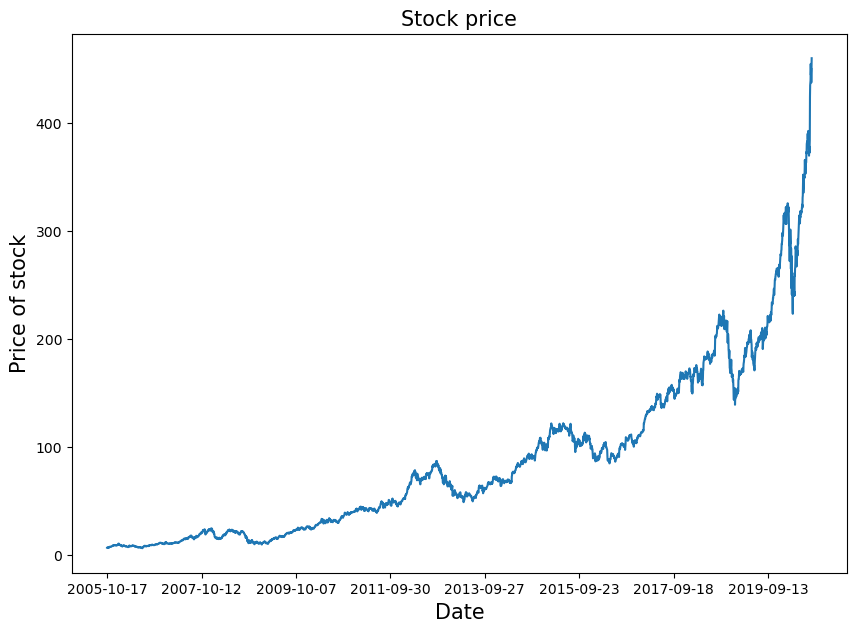

In [112]:
plt.title("Stock price" ,fontsize= 15)
df_stock['Close'].plot(figsize=(10, 7))
plt.xlabel("Date",fontsize = 15)
plt.ylabel("Price of stock",fontsize = 15)


In [113]:
df_stock = df_stock.drop(columns='Date_col')

In [128]:
x = df_stock.drop(columns=['Close_forcast'], axis=1)
y = df_stock['Close_forcast']
x_train,x_val,y_train,y_val =  train_test_split(x,y ,test_size=0.02,shuffle = False)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle = False)
print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)
    

(3291, 61) (366, 61) (75, 61)
(3291,) (366,) (75,)


In [129]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [130]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 3.77222720e-03  2.43945137e-01  1.97898232e-01  1.21666511e+00
  9.00505304e-11  9.47535990e-03  1.53008756e-01  1.15107122e-01
  4.70955714e-02  1.43286172e-01  1.43401752e-01  7.17008874e-02
  6.06183822e-02  3.33873198e-01  3.13012435e-01  1.34058454e-01
  8.62916657e-02 -2.53695863e-03 -4.53135917e-01 -4.53135917e-01
 -4.53135917e-01 -4.53135917e-01 -4.53135917e-01  1.87777628e+00
 -1.26468681e+00 -3.29145011e-01 -1.10198880e-03  4.24323085e-13
 -5.91717776e-03  6.47499490e-03  1.03820171e-03  1.03820171e-03
  1.51429768e+00 -2.90169888e-10  7.17126081e-11  2.08231880e-02
  1.09177265e-02 -2.12310078e-02  6.02094033e-03  2.13640159e-01
 -7.17382269e-02 -2.66704913e-01  2.55286522e-01  3.79074116e-01
 -4.44089210e-16 -4.31876656e-02  4.36192436e-02  6.25205389e-01
 -4.39275286e-02 -7.88682020e-02  3.32298811e-02 -5.96885660e-02
  5.89318902e-02  6.86817678e-02  3.03310607e-02  1.36409859e-02
 -1.04910550e-02 -3.88488581e-03 -1.69126974e-03  1.41329369e-03
  3.58

In [131]:
print("Performance (R^2): ", lr.score(x_train, y_train))

Performance (R^2):  0.9994232950188646


In [132]:
y_train_pred = lr.predict(x_train)
y_val_pred = lr.predict(x_val)
y_test_pred = lr.predict(x_test)

In [133]:
def get_mape(y_true,y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)-(y_true))) * 100

In [134]:
print("Training R-squared: ",round(metrics.r2_score(y_train,y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(y_train,y_train_pred),2))
print('Training MAPE:', round(get_mape(y_train,y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(y_train,y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(y_train,y_train_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 6637.5
Training Mean Squared Error: 1.58
Training RMSE:  1.26
Training MAE:  0.77


In [135]:
print("Validation R-squared: ",round(metrics.r2_score(y_val,y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(y_val,y_val_pred),2))
print('Validation MAPE:', round(get_mape(y_val,y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(y_train,y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(y_val,y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(y_val,y_val_pred),2))


Validation R-squared:  0.99
Validation Explained Variation:  0.99
Validation MAPE: 21999.22
Validation Mean Squared Error: 1.58
Validation RMSE:  5.94
Validation MAE:  3.71


In [136]:
print("Test R-squared: ",round(metrics.r2_score(y_test,y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(y_test,y_test_pred),2))
print('Test MAPE:', round(get_mape(y_test,y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(y_test,y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(y_test,y_test_pred),2))

Test R-squared:  1.0
Test Explained Variation:  1.0
Test MAPE: 8146.79
Test Mean Squared Error: 3.67
Test RMSE:  1.92
Test MAE:  1.03


In [137]:
y_train

Date
2005-10-17      6.45
2005-10-18      6.78
2005-10-19      6.93
2005-10-20      6.87
2005-10-21      7.01
               ...  
2018-11-05    198.68
2018-11-06    204.71
2018-11-07    204.00
2018-11-08    200.06
2018-11-09    189.99
Name: Close_forcast, Length: 3291, dtype: float64

In [138]:
df_pred = pd.DataFrame(y_val.values, columns=['Actual'], index=y_val.index)
df_pred['Predicted'] = y_val_pred

df_pred

,Actual,Predicted
Date,,
2018-11-12,188.09,190.155954
2018-11-13,182.77,190.113790
2018-11-14,187.28,184.174856
2018-11-15,189.36,187.563886
2018-11-16,181.85,188.827197
...,...,...
2020-04-22,273.79,275.402993
2020-04-23,281.70,273.052315
2020-04-24,281.90,279.169711


<Axes: xlabel='Date'>

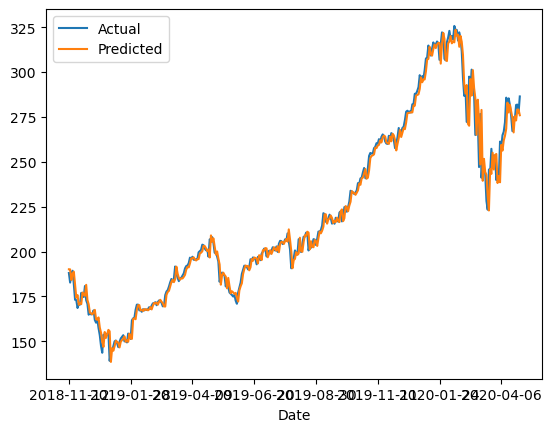

In [139]:
df_pred[['Actual', 'Predicted']].plot()

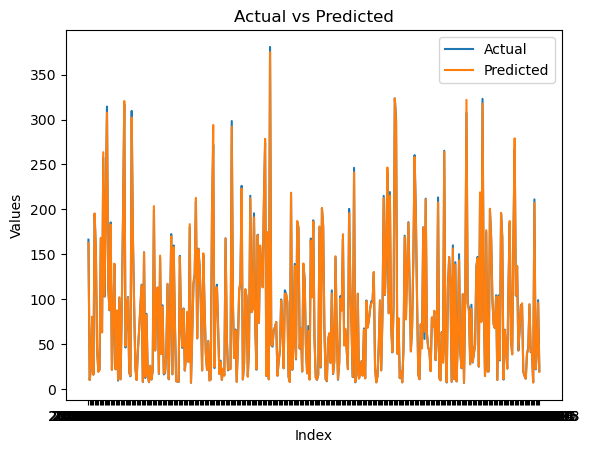

In [126]:
import matplotlib.pyplot as plt

# Assuming df_pred has 'Actual' and 'Predicted' columns
plt.plot(df_pred['Actual'], label='Actual')
plt.plot(df_pred['Predicted'], label='Predicted')

plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()
